# Bài tập về nhà tuần 6

In [ ]:
!pip install openml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 119 kB 4.4 MB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
  Created wheel for openml: filename=openml-0.12.2-py3-none-any.whl size=137326 sha256=41d67a64d8c332cbd0295dfae25841445c407ca1a8fcc11a0f3cb6a013928916
  Stored in directory: /root/.cache/pip/wheels/6a/20/88/cf4ac86aa18e2cd647ed16ebe274a5dacee9d0075fa02af250
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=3a1458d1c1228344027c242f8d194e7f956387b3a5f033e29b86dc026f9f68f2
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built openml liac-arff


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml

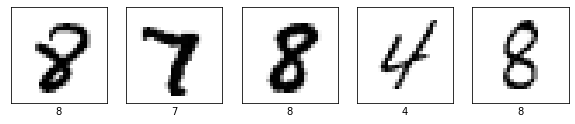

In [ ]:
mnist = oml.datasets.get_dataset(554)
X, y, _, _ = mnist.get_data(target=mnist.default_target_attribute, dataset_format='array');
X = X.reshape(70000, 28, 28)

# Take some random examples
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X[n], cmap=plt.cm.gray_r)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel("{}".format(y[n]))
plt.show();

## Bài 1:

- Xây dựng mô hình KNN sử dụng tập dữ trên(Lưu ý: tách dữ liệu thành ba tập)
- Đánh giá kết quả mô hình sau khi xây dựng bằng precision, recall và F1-Score


In [ ]:
X = np.array(X)
X_pca = []
for image in X:
    X_pca.append(image.flatten())
X_pca = np.array(X_pca)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y,
                                                    test_size=0.2,
                                                    random_state =42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.15,
                                                    random_state =42)

In [ ]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#predict
y_pred_val = model.predict(X_val)
precision_score(y_val, y_pred_val,average = 'micro')

0.9703571428571428

In [ ]:
#recall
y_pred_val = model.predict(X_val)
recall_score(y_val, y_pred_val,average = 'micro')

0.9703571428571428

In [ ]:
#F1_score
y_pred_val = model.predict(X_val)
f1_score(y_val, y_pred_val,average = 'micro')

## Bài 2:

- Sử dụng GridSearch để tìm tham số cải thiện kết quả mô hình

In [ ]:
from sklearn.model_selection import GridSearchCV


neigh = KNeighborsClassifier()

params = {
    'n_neighbors': [i for i in range(1,20)],
    'weights': ['uniform', 'distance']
}

clf = GridSearchCV(
    estimator=neigh,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [ ]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


KeyboardInterrupt: ignored